# Improved Real Estate Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectFromModel

# Load the data
data = pd.read_csv('real_estate_value.csv')
print(data.head())
print(data.info())

   HouseAge  DistanceToMRT  NoOfStores  Latitude  Longitude  UnitPrice
0      32.0       84.87882          10  24.98298  121.54024       37.9
1      19.5      306.59470           9  24.98034  121.53951       42.2
2      13.3      561.98450           5  24.98746  121.54391       47.3
3      13.3      561.98450           5  24.98746  121.54391       54.8
4       5.0      390.56840           5  24.97937  121.54245       43.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HouseAge       414 non-null    float64
 1   DistanceToMRT  414 non-null    float64
 2   NoOfStores     414 non-null    int64  
 3   Latitude       414 non-null    float64
 4   Longitude      414 non-null    float64
 5   UnitPrice      414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None


## Data Preprocessing and Feature Engineering

In [2]:
# Check for missing values and duplicates
print("Missing values:", data.isnull().sum().sum())
print(f"Duplicate rows: {data.duplicated().sum()}")

# Remove duplicates
data.drop_duplicates(inplace=True)

# Feature engineering
data['DistanceToMRT_log'] = np.log1p(data['DistanceToMRT'])
data['HouseAge_squared'] = data['HouseAge'] ** 2

# Separate features and target
X = data.drop('UnitPrice', axis=1)
y = data['UnitPrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to dataframe for better feature handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Missing values: 0
Duplicate rows: 0


## Model Fine-tuning

In [3]:
# Decision Tree fine-tuning
dt_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train_scaled, y_train)

print("Best Decision Tree parameters:", dt_grid.best_params_)
dt_best = dt_grid.best_estimator_

# Random Forest fine-tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)

print("Best Random Forest parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_

Best Decision Tree parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


## Model Evaluation

In [4]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Train MAE: {train_mae:.2f}")
    print(f"Test MAE: {test_mae:.2f}")
    print(f"Train R2: {train_r2:.2f}")
    print(f"Test R2: {test_r2:.2f}")

print("Decision Tree Performance:")
evaluate_model(dt_best, X_train_scaled, X_test_scaled, y_train, y_test)

print("\nRandom Forest Performance:")
evaluate_model(rf_best, X_train_scaled, X_test_scaled, y_train, y_test)

Decision Tree Performance:
Train RMSE: 5.33
Test RMSE: 6.82
Train MAE: 3.28
Test MAE: 4.88
Train R2: 0.85
Test R2: 0.72

Random Forest Performance:
Train RMSE: 5.87
Test RMSE: 5.73
Train MAE: 3.70
Test MAE: 3.90
Train R2: 0.82
Test R2: 0.80


## Feature Importance and Selection

Feature Importance:
             feature  importance
5  DistanceToMRT_log    0.335270
1      DistanceToMRT    0.325973
3           Latitude    0.124356
0           HouseAge    0.080992
6   HouseAge_squared    0.077469
4          Longitude    0.043194
2         NoOfStores    0.012747


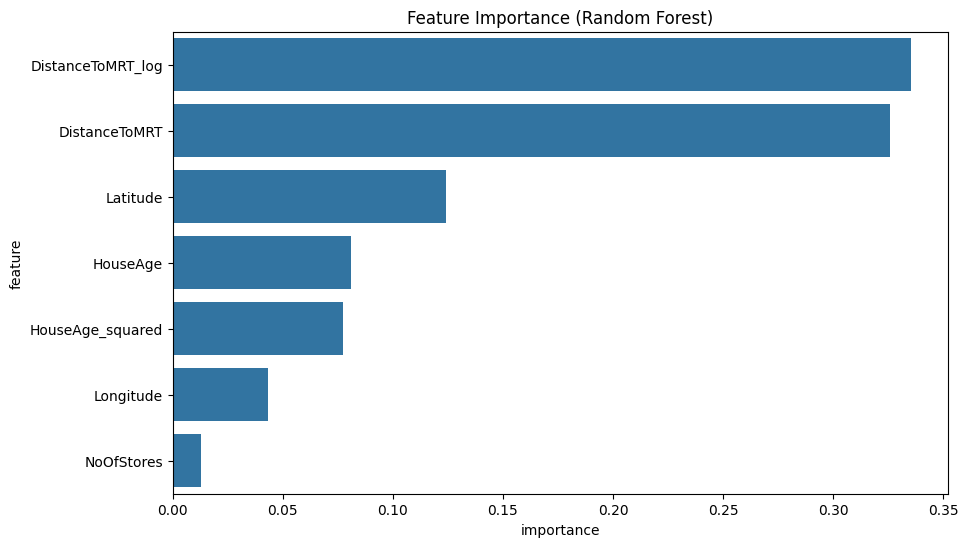

C:\Users\ar356\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\ar356\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



Random Forest Performance with Selected Features:
Train RMSE: 7.06
Test RMSE: 6.95
Train MAE: 4.78
Test MAE: 4.98
Train R2: 0.73
Test R2: 0.71


In [5]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_best.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()

# Select important features
selector = SelectFromModel(rf_best, prefit=True)
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Train a new Random Forest model with selected features
rf_selected = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
rf_selected.fit(X_train_selected, y_train)

print("\nRandom Forest Performance with Selected Features:")
evaluate_model(rf_selected, X_train_selected, X_test_selected, y_train, y_test)